In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
def cv_show(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
def show(img, result):
    plt.figure(figsize=(48, 48))
    plt.subplot(2, 1, 1)
    cv_show(img)
    plt.subplot(2, 1, 2)
    cv_show(result)

## Image 1

In [180]:
img = cv2.cvtColor(io.imread("tasks/text/text1.jpg"), cv2.COLOR_BGR2RGB)

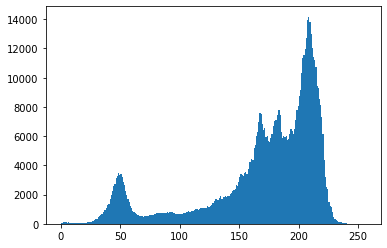

In [181]:
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.hist(grayscaled.ravel(),256,[0,256])
plt.show()

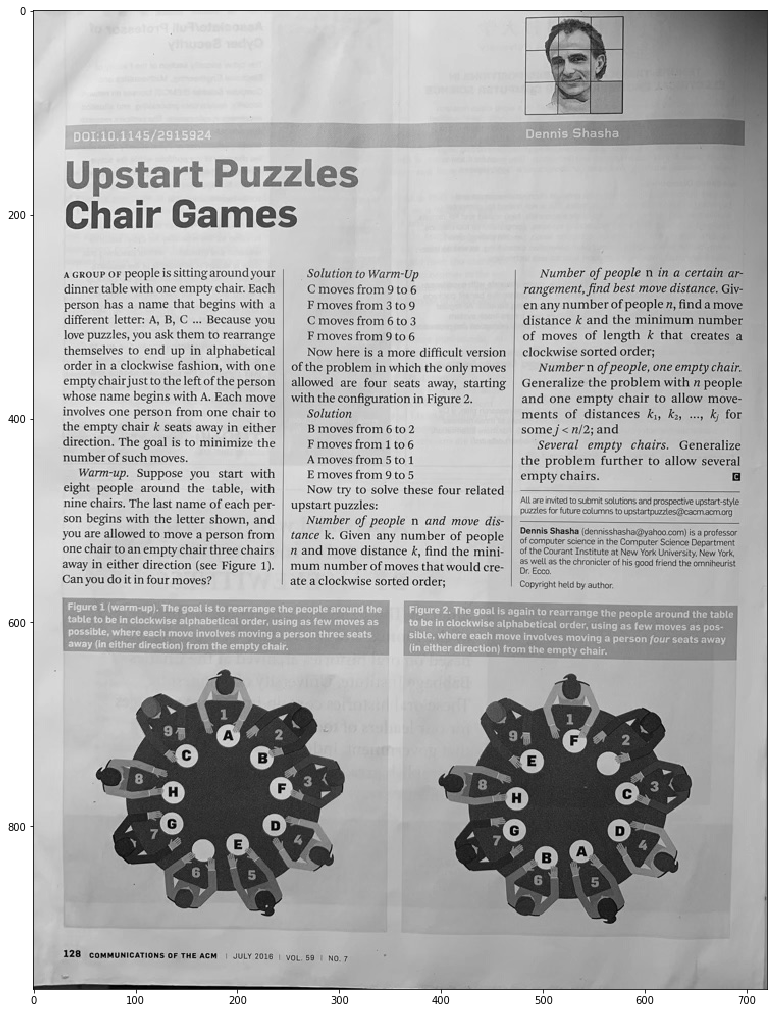

In [182]:
plt.figure(figsize=(24, 18))
plt.imshow(grayscaled, cmap='gray')

In [183]:
# grayscaled = cv2.GaussianBlur(grayscaled,(3,3),0)

In [184]:
# plt.figure(figsize=(22, 16))
# plt.imshow(grayscaled, cmap='gray')

In [185]:
retval, threshold = cv2.threshold(grayscaled, 160, 255, cv2.THRESH_BINARY)

In [186]:
# threshold = cv2.adaptiveThreshold(grayscaled, 255,
#                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                           cv2.THRESH_BINARY, 15, 3)

In [187]:
# retval, threshold = cv2.threshold(grayscaled, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

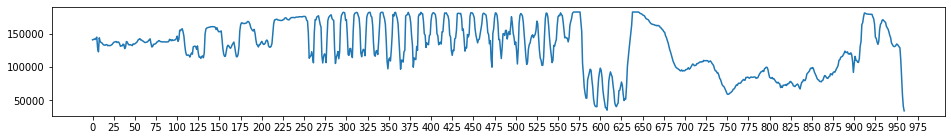

In [188]:
plt.figure(figsize=(16, 2))
plt.xticks(ticks=range(0, 1000, 25))
plt.plot(np.sum(threshold, axis=1))


In [189]:
first_threshold = 140
second_threshold = 640

In [190]:
threshold[0:first_threshold, :] = 255
threshold[second_threshold:, :] = 255

In [191]:
# threshold = cv2.fastNlMeansDenoising(threshold,None,80,5,15)

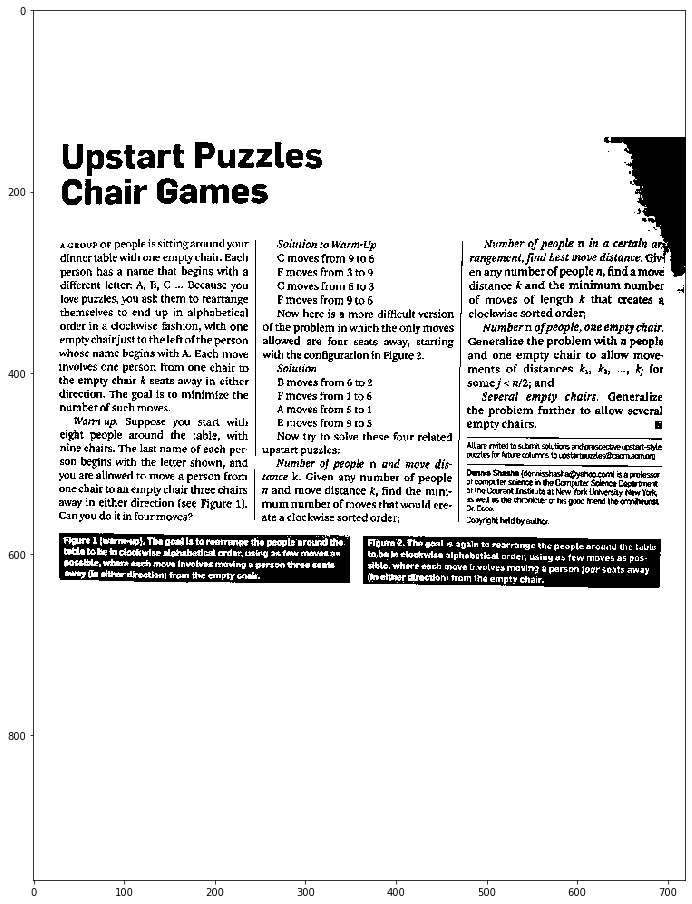

In [192]:
plt.figure(figsize=(24, 16))
plt.imshow(threshold, cmap='gray')

In [460]:
def thresholding(grayscaled, th):
    retval, threshold = cv2.threshold(grayscaled, th, 255, cv2.THRESH_BINARY)
    return threshold

def nlDenoise(grayscaled, blur=80, k=8, w_size=15):
    return cv2.fastNlMeansDenoising(grayscaled,None,blur,k,w_size)

def blur_threshold(grayscaled, th, k_size=5):
    image1 = cv2.GaussianBlur(grayscaled,(k_size,k_size),0) 
    ret, image2 = cv2.threshold(image1, th, 255, cv2.THRESH_BINARY)
    return image2

def dilate_erode(grayscaled):
    kernel = np.array([[0,1,0], [1,1,1],[0,1,0]], np.uint8) 
    image1 = cv2.dilate(grayscaled, kernel, iterations=1) 
    image2 = cv2.erode(image1, kernel, iterations=1)
    return image2

def erode_dilate(grayscaled):
    kernel = np.array([[0,1,0], [1,1,1],[0,1,0]], np.uint8) 
    image1 = cv2.dilate(grayscaled, kernel, iterations=1) 
    image2 = cv2.erode(image1, kernel, iterations=1)
    return image2

def adaptive(grayscaled, blocksize=15, param=5):
    return cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, param)

def otsu(grayscaled):
    retval, im = cv2.threshold(grayscaled, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return im


## Image 2

In [515]:
img = cv2.cvtColor(io.imread("tasks/text/text2.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [525]:
upper, middle, bottom = grayscaled[:150], grayscaled[150:750], grayscaled[750:]
upper = blur_threshold(adaptive(upper), th=130)
middle = nlDenoise(adaptive(middle))
bottom = cv2.bitwise_not(bottom)
bottom = thresholding(nlDenoise(adaptive(bottom, blocksize=15, param=50), blur=50, k=8), th=160)

In [526]:
threshold = np.vstack([upper, middle, bottom])

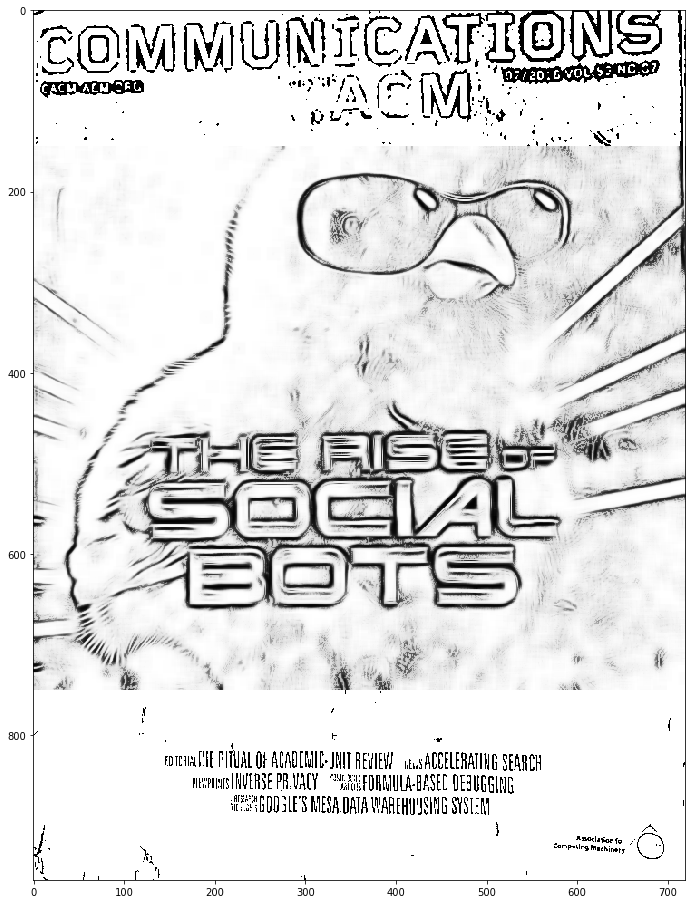

In [527]:
plt.figure(figsize=(22, 16))
plt.imshow(threshold, cmap='gray')

## Image 3

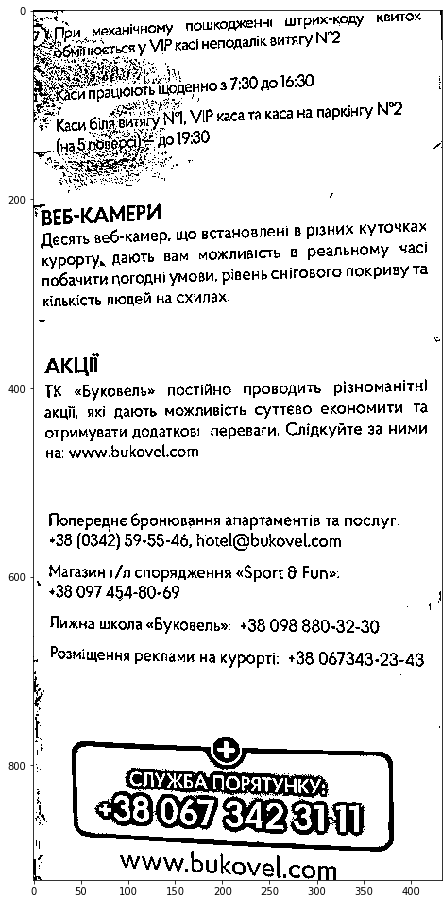

In [435]:
img = cv2.cvtColor(io.imread("tasks/text/text3.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled), blur=60), th=190)
plt.figure(figsize=(22, 16))
plt.imshow(threshold, cmap='gray')

## Image 4

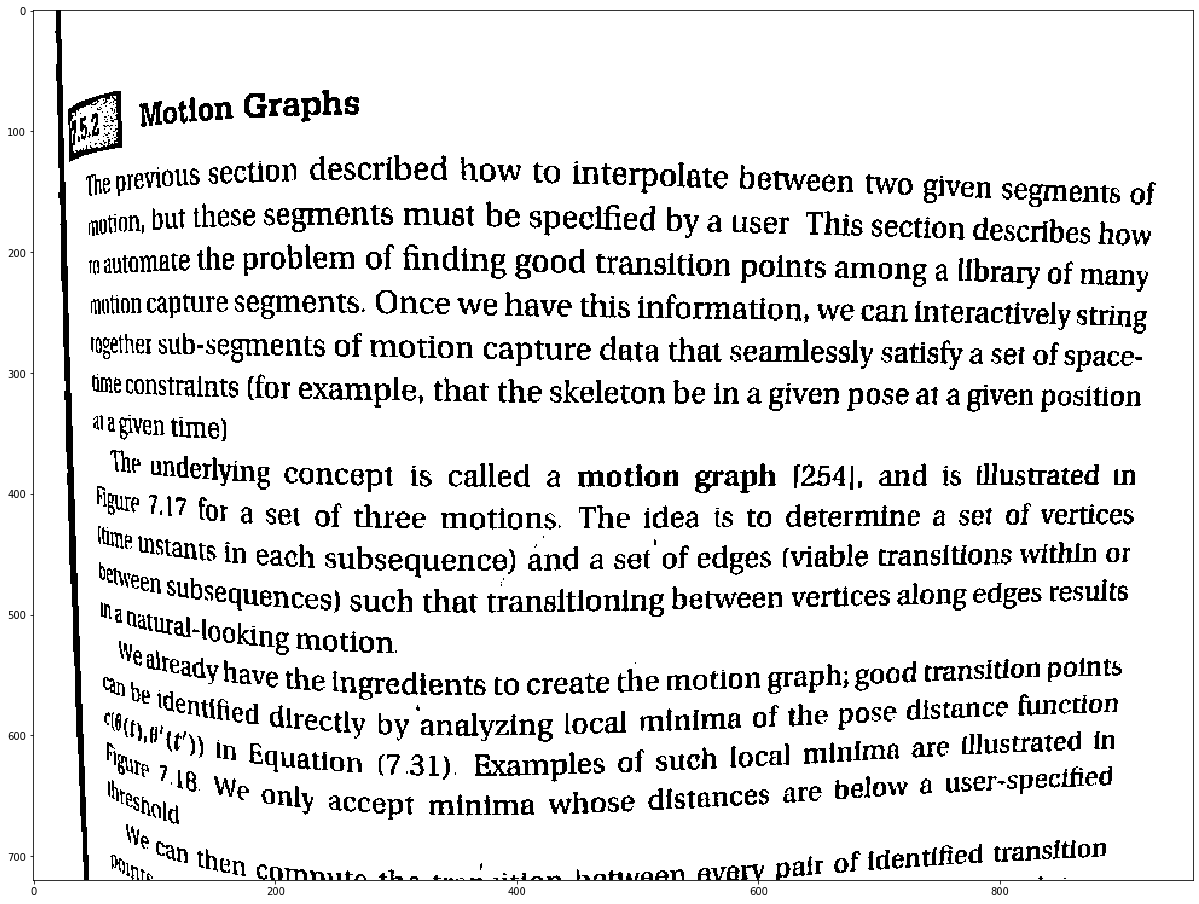

In [440]:
img = cv2.cvtColor(io.imread("tasks/text/text4.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled), blur=70), th=190)
plt.figure(figsize=(22, 16))
plt.imshow(threshold, cmap='gray')

## Image 5

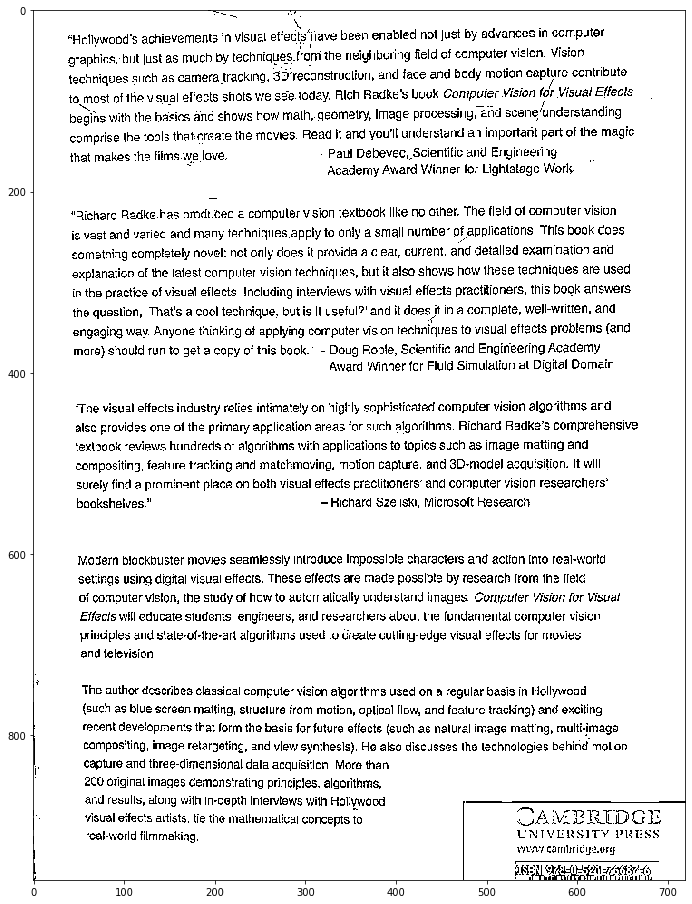

In [506]:
img = cv2.cvtColor(io.imread("tasks/text/text5.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled, blocksize=5, param=15), blur=50, k=8), th=200)
plt.figure(figsize=(22, 16))
plt.imshow(threshold, cmap='gray')

## Image 6

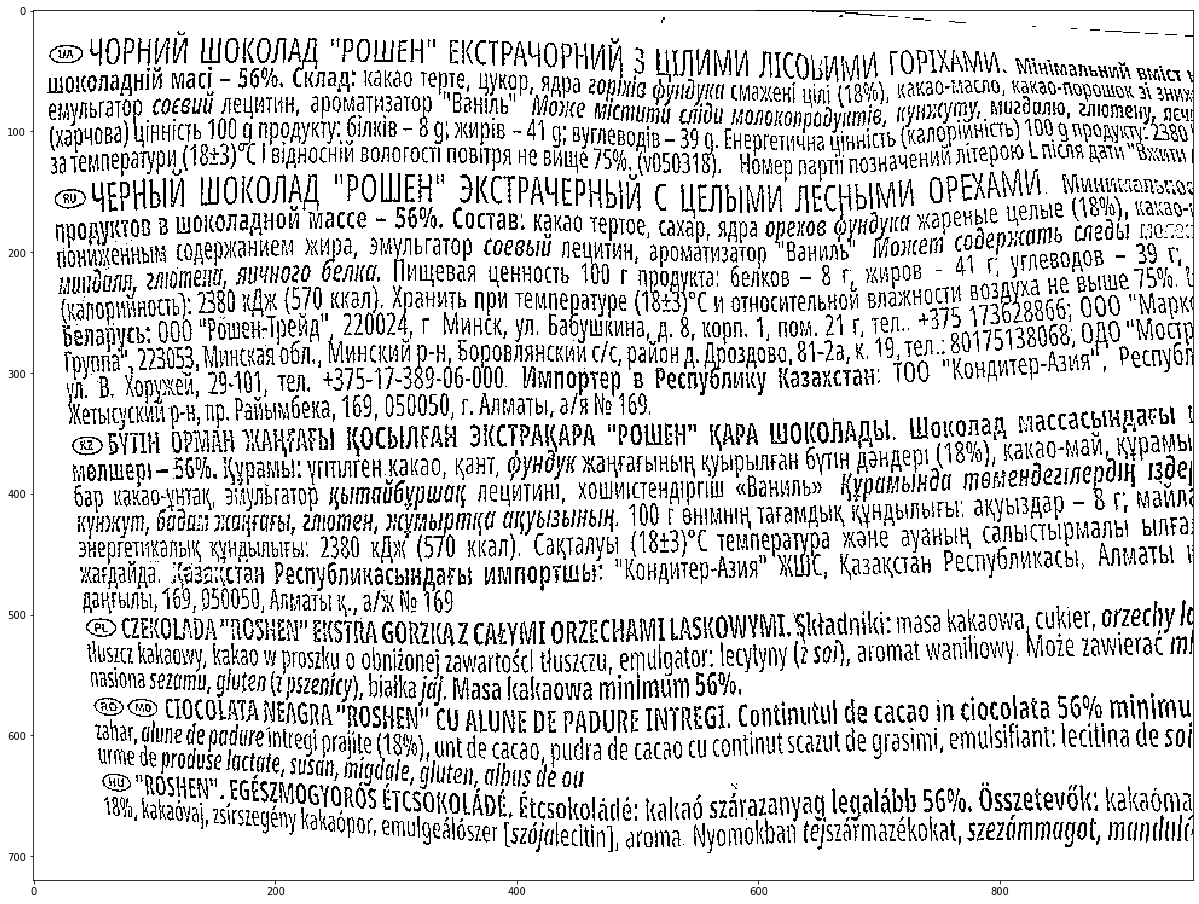

In [505]:
img = cv2.cvtColor(io.imread("tasks/text/text6.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled, blocksize=5, param=15), blur=50, k=8), th=200)
plt.figure(figsize=(22, 16))
plt.imshow(threshold, cmap='gray')